# Importing the necessary library

In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

C:\Users\darsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf

# Assuming logits and labels are your model's logits and corresponding labels
logits = tf.constant([[0.5, 0.5, 2.0], [2.0, 1.0, 0.1]])
labels = tf.constant([2, 0])

# Calculate sparse softmax cross entropy loss
loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

# Print the calculated loss
print("Loss:", loss.numpy())

Loss: 0.39300555


In [3]:
# Avoid OOM errors by setting GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memeory_growth(gpu,True)

In [4]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\darsh\AppData\Local\Temp\pip-install-y9mmgbbf\tensorflow-gpu_25cf4a0babe744b39e558a69c9f64362\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [5]:
tf.config.list_physical_devices('GPU')

[]

# OpenCV (cv2):
Description:
OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It provides a wide range of tools and functions for image and video processing, including image manipulation, feature detection, object recognition, and more.

# imghdr:

Description:
The imghdr module provides functions to determine the type of an image file based on its content. It is a simple module used for inspecting the header and file signature to guess the file format of an image.

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'Data'

In [8]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1dd385ada2e2a3439b47f3cea5052ab46479c56a-1200x700.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'compassion.jpg',
 'Couple_Happy_money_062618.jpg',
 'diverse-happy-people-united-concept-101678776.jpg',
 'dv2051009.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',

In [9]:
image_exts=['jpeg','jpg','bmp','png','gif','tiff','raw','svg']

In [68]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
image_exts[3]

'png'

In [11]:
img= cv2.imread(os.path.join('Data','happy','1HEoLBLidT2u4mhJ0oiDgig.png'))

In [12]:
img.shape

(933, 1400, 3)

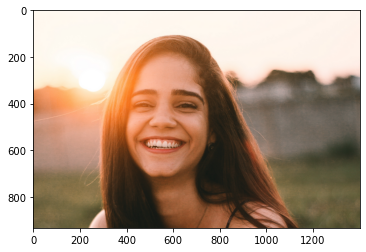

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Load the Data

In [16]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 219 files belonging to 2 classes.


In [17]:
data_iterator= data.as_numpy_iterator()

In [18]:
data_iterator

In [19]:
batch = data_iterator.next()

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
scaled=batch[0]/255

In [22]:
scaled

array([[[[0.19215687, 0.23529412, 0.30588236],
         [0.19148284, 0.2346201 , 0.30520833],
         [0.20572917, 0.24886642, 0.31945467],
         ...,
         [0.14117648, 0.17254902, 0.21568628],
         [0.14117648, 0.17254902, 0.21568628],
         [0.13333334, 0.16470589, 0.20784314]],

        [[0.18814339, 0.23128064, 0.3018689 ],
         [0.20376839, 0.24690564, 0.3174939 ],
         [0.20078364, 0.24392089, 0.31450912],
         ...,
         [0.14117648, 0.17254902, 0.21568628],
         [0.14117648, 0.17254902, 0.21568628],
         [0.13333334, 0.16470589, 0.20784314]],

        [[0.20055147, 0.24368873, 0.31427696],
         [0.2       , 0.24313726, 0.3137255 ],
         [0.19914216, 0.24227941, 0.31286764],
         ...,
         [0.14117648, 0.17254902, 0.21568628],
         [0.14117648, 0.17254902, 0.21568628],
         [0.13333334, 0.16470589, 0.20784314]],

        ...,

        [[0.34574574, 0.40849084, 0.5104516 ],
         [0.40601784, 0.46876293, 0.5707237 ]

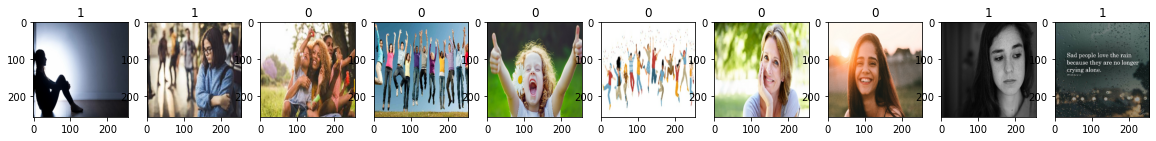

In [23]:
fig, ax= plt.subplots(ncols=10,figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Class 1 = sad people
# Class 0 = happy people

# 

# scale data

In [26]:
data = data.map(lambda x, y :(x/255,y))

In [27]:
data.as_numpy_iterator().next()[0].min()

0.0

In [28]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


# Split the data

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [30]:
train_size+val_size+test_size

7

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [32]:
len(train)

4

# Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


4/4 [==============================] - 3s 511ms/step - loss: 0.8972 - accuracy: 0.5469 - val_loss: 0.7530 - val_accuracy: 0.3594
Epoch 2/20
4/4 [==============================] - 2s 470ms/step - loss: 0.6541 - accuracy: 0.5156 - val_loss: 0.4816 - val_accuracy: 0.7188
Epoch 3/20
4/4 [==============================] - 2s 477ms/step - loss: 0.6675 - accuracy: 0.5781 - val_loss: 0.5533 - val_accuracy: 0.7969
Epoch 4/20
4/4 [==============================] - 2s 462ms/step - loss: 0.5704 - accuracy: 0.7656 - val_loss: 0.4984 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 2s 475ms/step - loss: 0.5447 - accuracy: 0.6797 - val_loss: 0.4734 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 2s 482ms/step - loss: 0.4547 - accuracy: 0.8359 - val_loss: 0.4867 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 2s 470ms/step - loss: 0.4041 - accuracy: 0.8125 - val_loss: 0.3648 - val_accuracy: 0.9219
Epoch 8/20
4/4 [==

# Plot the Performance

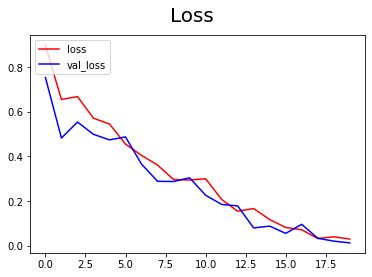

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

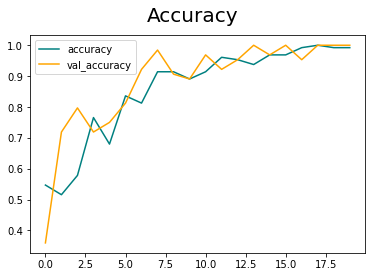

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 149ms/step


In [47]:
print(f'Precision:{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:1.0, Recall:1.0, Accuracy:1.0


# Test

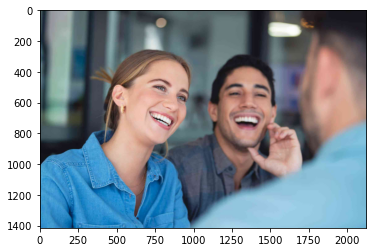

In [48]:
img = cv2.imread('happytest.jpg.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


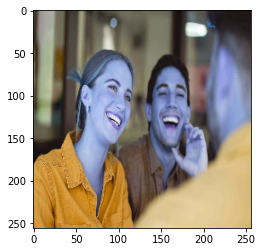

In [49]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))


In [50]:
resize.shape

TensorShape([256, 256, 3])

In [53]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [54]:
yhat = model.predict (np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 26ms/step


In [55]:
import numpy as np

In [56]:
yhat

array([[0.04465256]], dtype=float32)

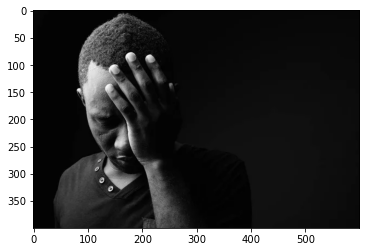

In [57]:
img = cv2.imread('sadtest.jpg.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

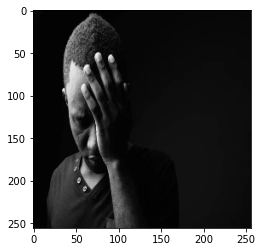

In [58]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [59]:
yhat = model.predict (np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [60]:
yhat

array([[0.99661756]], dtype=float32)

In [61]:
if yhat>0.5:
    print( f'predicted class is sad')
else:
    print(f'predicted class is happy')

predicted class is sad


# Save the Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save(os.path.join('models','happy_sad_model.h5'))

C:\Users\darsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
os.path.join('models','happy_sad_model.h5')

'models\\happy_sad_model.h5'

In [66]:
new_model = load_model(os.path.join('models\\happy_sad_model.h5'))

In [67]:
new_model